### Import

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sc
import pandas as pd
import seaborn as sns

# Chargement des donnés

In [11]:
df = pd.read_csv("gameData.csv")
nb_exp = df.date.nunique()
print("Nombre d'expérience: " + str(df.date.nunique()))
print("Taile de la bd : "+ str(len(df)) + " exemples")
time = df.loc[len(df.index)-1].exp_total_time / 1000
print("Temps limite: " + str(int(time//60)) + " min " + str(int(np.floor(time%60))) + "s")
print("Nombre de verrous: " +str(df[df.columns[13]].unique()))
print("Fréquence des formes:  "+str(df[df.columns[9]].unique()))
df = df[df["time"]<20000]
test_id = pd.factorize(pd._libs.lib.fast_zip([df.user_ip.values, df.date.values]))
df["test_id"] = test_id[0]

print("Nom des parametres:")
columns = list(df.columns)
for i in range(len(columns)):
    print(f'{i} : {columns[i]}')


Nombre d'expérience: 20
Taile de la bd : 5486 exemples
Temps limite: 10 min 30s
Nombre de verrous: [ 8 10 12  4  6]
Fréquence des formes:  [1 8 6 4]
Nom des parametres:
0 : date
1 : user_ip
2 : trial_id
3 : block_id
4 : n_trials
5 : n_block
6 : block_size
7 : target_shape
8 : target_id
9 : target_freq
10 : target_n
11 : timeLearning
12 : setting_used
13 : n_locks
14 : lock_duration
15 : unlock_action
16 : lock_state
17 : occurrence
18 : time
19 : time_selected
20 : time_next
21 : slider_display_span
22 : n_opened_locker
23 : first_unlock_occurrence
24 : first_unlock_trial
25 : nb_total_click
26 : exp_total_time
27 : mode_used
28 : test_id


In [12]:
np.mean(df["n_trials"].unique())/19

14.436842105263159

In [13]:
print(f"---Apercu des settings dans la Dataframe---")
dconfig = df[df.columns[[11,12,13,14]]]
dconfig = dconfig.groupby(dconfig["setting_used"])
settingLen = len(dconfig)
dconfig.head(1)

---Apercu des settings dans la Dataframe---


,timeLearning,setting_used,n_locks,lock_duration
0,60000,8*3.3s,8,3300.0
620,60000,10*1.8s,10,1800.0
940,60000,12*0.8s,12,800.0
1161,60000,4*10.8s,4,10800.0
1396,60000,6*5.8s,6,5800.0


In [14]:
def getExperience(df,n):
    return df.loc[df["test_id"] == n ]

set1 = getExperience(df,0)
shape = list(np.unique(set1["target_shape"]))
shapeList = []
for i in shape:
    shapeList.append(set1.loc[set1["target_shape"] == i])
shapeList[0].head()
allconfig = []
for i in range(len(shape)):
    allconfig.append(shapeList[i][shapeList[i].columns[[4,5,6,7,8,9,10]]].iloc[0])
allconfig = pd.DataFrame(allconfig)
print("Un bloc est formé de " + str(allconfig.target_freq.sum()) + " formes")
allconfig[["target_shape","target_freq","target_n"]]

Un bloc est formé de 19 formes


,target_shape,target_freq,target_n
9,Circle,4,5
1,Cross,8,5
2,Square,6,5
0,Triangle,1,5


# Fonctions Utiles

In [15]:
def printStats(X):
    print(f'Mean : {np.mean(X)}, Min : {np.min(X)}, Max : {np.max(X)}, Std : {np.std(X)}')

In [16]:
def plot(X,Y,legendX, legendY):
    ax = plt.subplot(1,1,1)
    ax.set_title(f'{legendX} vs {legendY}')
    ax.scatter(x=X,y=Y,label='Data')
    plt.plot(X, Y,color='red',label='Fitting Line')
    ax.set_xlabel(legendX)
    ax.set_ylabel(legendY)
    ax.legend(loc='best')
    plt.show()

In [17]:
def normalFromTimes(times,mode = None):
    ax = plt.subplot(1,1,1)
    if type(times) == list:
        for i in range(len(times)):
            sigma = np.std(times[i])
            mu = np.mean(times[i])
            Y = sc.norm(mu,sigma)
            X = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
            ax.scatter(x=X,y=Y.pdf(X),label=f'Data {mode[i]}')
            plt.plot(X, Y.pdf(X),color='red')
            ax.set_title(f'Repartition du temps')
    else:
        sigma = np.std(times)
        mu = np.mean(times)
        Y = sc.norm(mu,sigma)
        X = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
        ax.scatter(x=X,y=Y.pdf(X),label='Data')
        plt.plot(X, Y.pdf(X),color='red',label='Fitting Line')
        if mode:
            ax.set_title(f'Repartition du temps en mode {mode}')
    ax.set_xlabel('Temps (en ms)')
    ax.legend(loc='best')
    plt.show()

In [18]:
def showTrialbyId(dtime, Id):
    id_exp = dtime.loc[dtime["test_id"] == Id ]
    sns.relplot(data = id_exp,x="trial_id",y="time",hue="mode_used",s=100)
    plt.plot(id_exp["trial_id"],id_exp["time"])
    plt.title("plot of the id "+str(Id))
    

# Visualisation

## Vérification des parametres

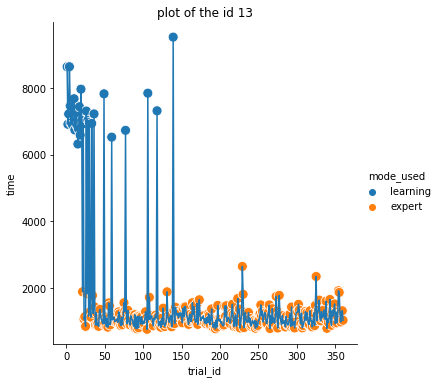

In [19]:
#Choix par utilisateur
showTrialbyId(df,13)

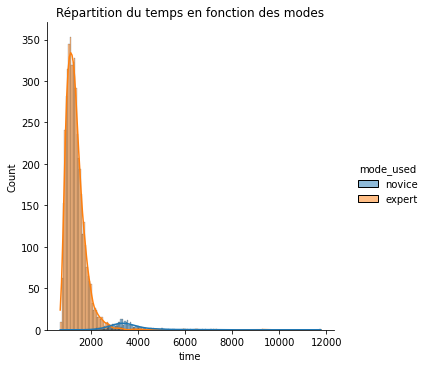

In [20]:
ax2 = sns.displot(x = "time", hue = "mode_used",kde = True, data = df[df["mode_used"] !="learning" ],)
plt.title("Répartition du temps en fonction des modes")
plt.show()

<Figure size 1080x720 with 0 Axes>

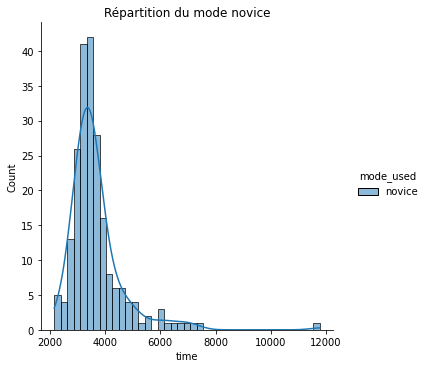

In [21]:
fig1 = plt.figure()
fig1.set_figheight(10)
fig1.set_figwidth(15)
ax2 = sns.displot(x = "time", hue = "mode_used",kde = True, data = df[df["mode_used"] =="novice" ],)
plt.title("Répartition du mode novice")
plt.show()

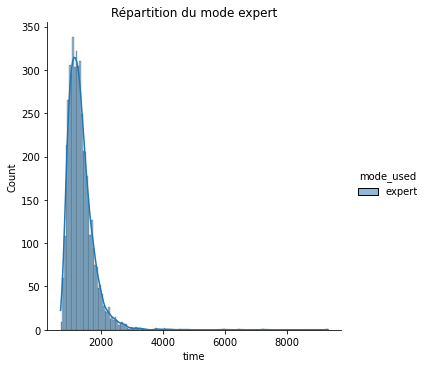

In [22]:
ax2 = sns.displot(x = "time", hue = "mode_used",kde = True, data = df[df["mode_used"] =="expert" ],)
plt.title("Répartition du mode expert")
plt.show()

Text(0.5, 1.0, 'Moyenne du temps en fonction du mode novice ou expert')

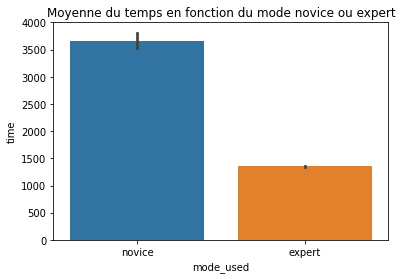

In [23]:
fig,ax = plt.subplots()
ax2 = sns.barplot(y = "time",x = "mode_used", data = df[df["mode_used"] !="learning" ])
plt.title("Moyenne du temps en fonction du mode novice ou expert")

In [24]:
ntime = df[df["mode_used"] =="novice"]["time"].mean()
etime = df[df["mode_used"] =="expert"]["time"].mean()
print(f'Temps moyen novice sur la population {np.ceil(ntime)}\nTemps moyen expert sur la population {np.ceil(etime)}')

Temps moyen novice sur la population 3666.0
Temps moyen expert sur la population 1352.0


Text(0.5, 1.0, 'Répartion du temps mis à ouvrir un verrou')

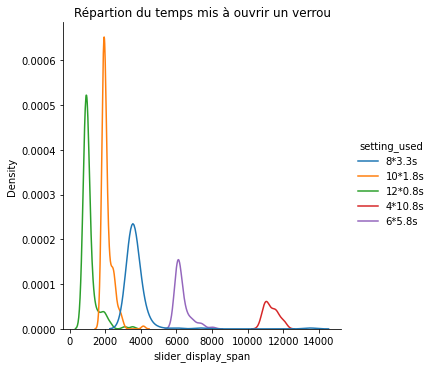

In [25]:
unlock = df[~df["mode_used"].isin(["novice","expert"])].copy()
ax3 = sns.displot(x = "slider_display_span", hue = "setting_used",kind = "kde", data = unlock)
plt.title("Répartion du temps mis à ouvrir un verrou")

Text(0.5, 1.0, 'Moyenne du mis à ouvrir un verrou')

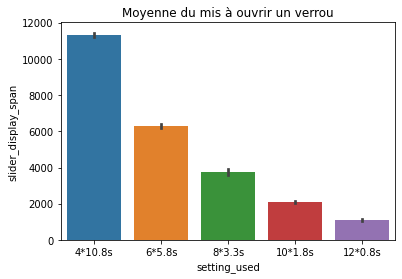

In [26]:
ax3 = sns.barplot(y = "slider_display_span",x = "setting_used", data = unlock,order=['4*10.8s', '6*5.8s', '8*3.3s','10*1.8s', '12*0.8s' ])
plt.title("Moyenne du mis à ouvrir un verrou")

In [27]:
unlock_grp = unlock.groupby(["setting_used"])
means_unlock = {}
for id,grp in unlock_grp:
    #filtre les essais avec 1 seconde de plus que prévu
    print(f"Moyenne pour {grp['setting_used'].iloc[0]}")
    print(grp[grp["slider_display_span"]<grp["lock_duration"]+1000]["slider_display_span"].mean())
    means_unlock[grp['setting_used'].iloc[0]] = grp[grp["slider_display_span"]<grp["lock_duration"]+1000]["slider_display_span"].mean()


Moyenne pour 10*1.8s
2051.4476744186045
Moyenne pour 12*0.8s
995.0576923076923
Moyenne pour 4*10.8s
11225.40625
Moyenne pour 6*5.8s
6178.017543859649
Moyenne pour 8*3.3s
3587.970588235294


## Graphes théoriques

In [28]:
freq = allconfig["target_freq"].to_list()
freq.sort()
total_freq = df.loc[0].block_size
noviceTime = 4.0
total_time = 10*60
average_complete_time = total_time/noviceTime
average_block = int(np.ceil(average_complete_time/total_freq))
print("En moyenne, il y aura " + str(average_block) + " bloc si tout etait fait en novice")

En moyenne, il y aura 8 bloc si tout etait fait en novice


In [29]:
maxTime = 10*60 
def simulateExp(unlocklist, total_learning,nblock,fr,noviceTime = 4.0,expertTime = 1.4):
    #temps total de la simulation
    time = 0
    #compteur du nombre de fois dans la frequence
    essai = [0,0,0,0]
    #temps passé dans cette frequence
    timeFreq = [0,0,0,0]
    #tant que le temps total n'est pas superieur au temps max
    history = []
    while (time<maxTime):
        #Pour chaque fréquence f
        for f in range(len(fr)):
            #On itere f fois
            for _ in range(fr[f]):
                #Si f est une frequence que l'on evalue (deverouille)
                if fr[f] in unlocklist:
                    #Si les verrous sont pas tous ouvert on ajoute total_learning/nb verrous
                    if essai[f]<nblock:
                        time += total_learning/nblock
                        timeFreq[f] += total_learning/nblock
                        
                    #Sinon ils sont tous ouvert, on ajoute le temps expert
                    else:
                        time += expertTime
                        timeFreq[f] += expertTime
                    history.append(timeFreq[f])
                #Sinon on est en mode novice
                else:
                    time += noviceTime
                    timeFreq[f] += noviceTime
                #+1 dans le compteur
                essai[f] +=1
                #on verifie que le temps n'est pas depassé
                if time>total_time:
                    return essai,timeFreq

essai,timeFreq = simulateExp([4],60,8,[1,4,6,8])
print(essai,timeFreq)
print([b/a for a,b in  zip(essai,timeFreq)])

[9, 36, 53, 64] [36.0, 99.20000000000014, 212.0, 256.0]
[4.0, 2.7555555555555595, 4.0, 4.0]


In [30]:
freq1 = [1,4,6,8]
total_time = 10*60
t = {"Setting":[],"Mode":[],"Fréquence" : [],"utilisation":[],"Temps dans ce mode": [], "utilisation totale": [], "Temps moyen dans le mode":[]}
for l in [4,6,8,10,12]:
    for j in [[],[1],[4],[6],[8]]:
        essai,timeFreq = simulateExp(j,60,l,freq1)
        for e,ti in zip(essai,timeFreq):
            if(round(ti/e,1) == noviceTime):
                if (j!=[]):
                    continue
            t["Setting"].append(str(l)+" lock")
            if j == [] :
                t["Mode"].append("Novice")
                t["Fréquence"].append("novice")
            else:
                t["Mode"].append("Only")
                t["Fréquence"].append(str(j[0]))
            
            t["utilisation"].append(e)
            t["Temps dans ce mode"].append(ti)
            t["utilisation totale"].append(sum(essai))
            t["Temps moyen dans le mode"].append(ti/e+1)
t = pd.DataFrame(t) 


Text(0.5, 1.0, "Graphe théorique du temps que l'utilisateur passe sous une fréquence en fonction de la fréquence")

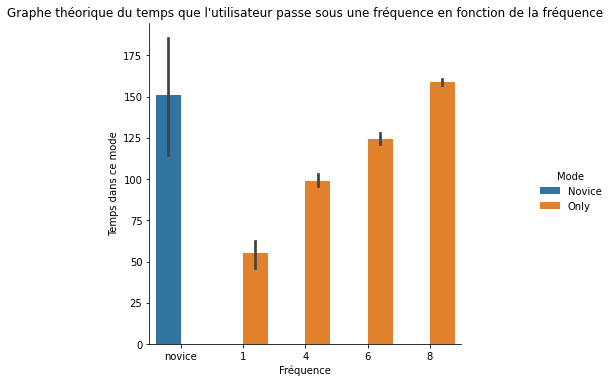

In [31]:
sns.catplot(data =t, x = "Fréquence", y ="Temps dans ce mode",hue="Mode",kind = "bar")
plt.title("Graphe théorique du temps que l'utilisateur passe sous une fréquence en fonction de la fréquence")

In [32]:
def learningTheo(freq,nbLock,nbBlock,total_learning = 60):
    res = {"n":[],"time":[],"lock":[],"novice":[]}
    for l in nbLock:
        time = 0
        essai = 0
        for i in range(1,nbBlock+1):
            for j in range(1,freq+1):
                if l>essai:
                    time+=total_learning/l
                else:
                    time+=1.4
                essai +=1
                res["lock"].append(l)
                res["n"].append(essai)
                res["time"].append((time/essai))
                res["novice"].append("no")
    for x in range(1,essai+1):
        res["lock"].append("novice")
        res["n"].append(x)
        res["time"].append(4)
        res["novice"].append("yes")
        
    return res

Text(0.5, 0.98, "Evolution théorique du temps moyen en fonction du nombre d'épreuve, si l'utilisateur n'utilise que le mode expert")

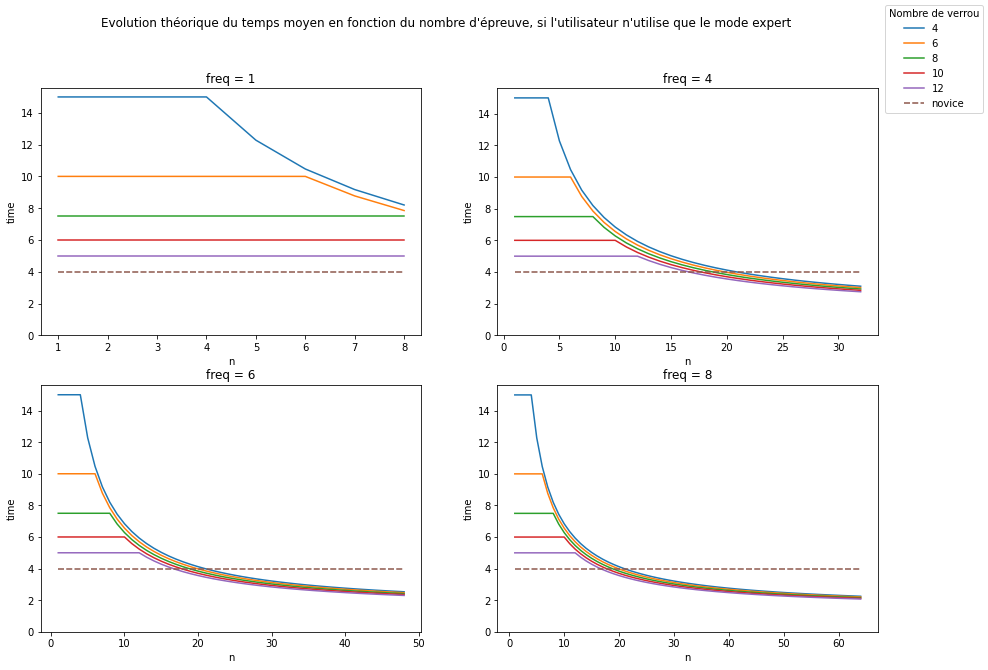

In [33]:
fig,ax = plt.subplots(2,2)
fig.set_figheight(10)
fig.set_figwidth(15)
plt.subplot(2,2,1)
res = pd.DataFrame(learningTheo(1,[4,6,8,10,12],8))
f2 = sns.lineplot(data = res,y="time",x = "n",hue="lock",style="novice",legend=False)
f2.set_yticks(range(0,16,2))
f2.title.set_text("freq = 1")
plt.subplot(2,2,2)
res = pd.DataFrame(learningTheo(4,[4,6,8,10,12],8))
f3 = sns.lineplot(data = res,y="time",x = "n",hue="lock",style="novice",legend=False)
f3.set_yticks(range(0,16,2))
f3.title.set_text("freq = 4")
plt.subplot(2,2,3)
res = pd.DataFrame(learningTheo(6,[4,6,8,10,12],8))
f4 = sns.lineplot(data = res,y="time",x = "n",hue="lock",style="novice",legend=False)
f4.set_yticks(range(0,16,2))
f4.title.set_text("freq = 6")
plt.subplot(2,2,4)
res = pd.DataFrame(learningTheo(8,[4,6,8,10,12],8))
f5 = sns.lineplot(data = res,y="time",x = "n",hue="lock",style="novice",legend=False)
f5.set_yticks(range(0,16,2))
f5.title.set_text("freq = 8")
fig.legend(labels=[4,6,8,10,12,"novice"],title="Nombre de verrou")
fig.suptitle("Evolution théorique du temps moyen en fonction du nombre d'épreuve, si l'utilisateur n'utilise que le mode expert")


## Visualisation des données collectées

In [34]:
user = {"Setting":[],"Fréquence" : [],"Mode":[],"utilisation":[],"Temps dans ce mode": [], "utilisation totale": [], "Temps moyen dans le mode":[]}
freq = [1,4,6,8]
for l in [4,6,8,10,12]:
    for j in [1,4,6,8]:
        user["Setting"].append(str(l)+" lock")
        user["Mode"].append("User")
        user["Fréquence"].append(str(j))
        user["utilisation"].append(df.loc[(df["target_freq"] == j)&(df["n_locks"] == l)]["time"].count())
        user["Temps dans ce mode"].append(df.loc[(df["target_freq"] == j)&(df["n_locks"] == l)]["time"].sum()/1000)
        user["utilisation totale"].append(df.loc[df["n_locks"] == l]["time"].count())
        userTime = df.loc[(df["target_freq"] == j)&(df["n_locks"] == l)]["time"].mean()
        user["Temps moyen dans le mode"].append(userTime/1000)
user = pd.DataFrame(user)
res = pd.concat([t,user])

Text(0.5, 0.98, "Graphe du temps que l'utilisateur passe sous une fréquence en fonction de la fréquence et du nombre de verrous")

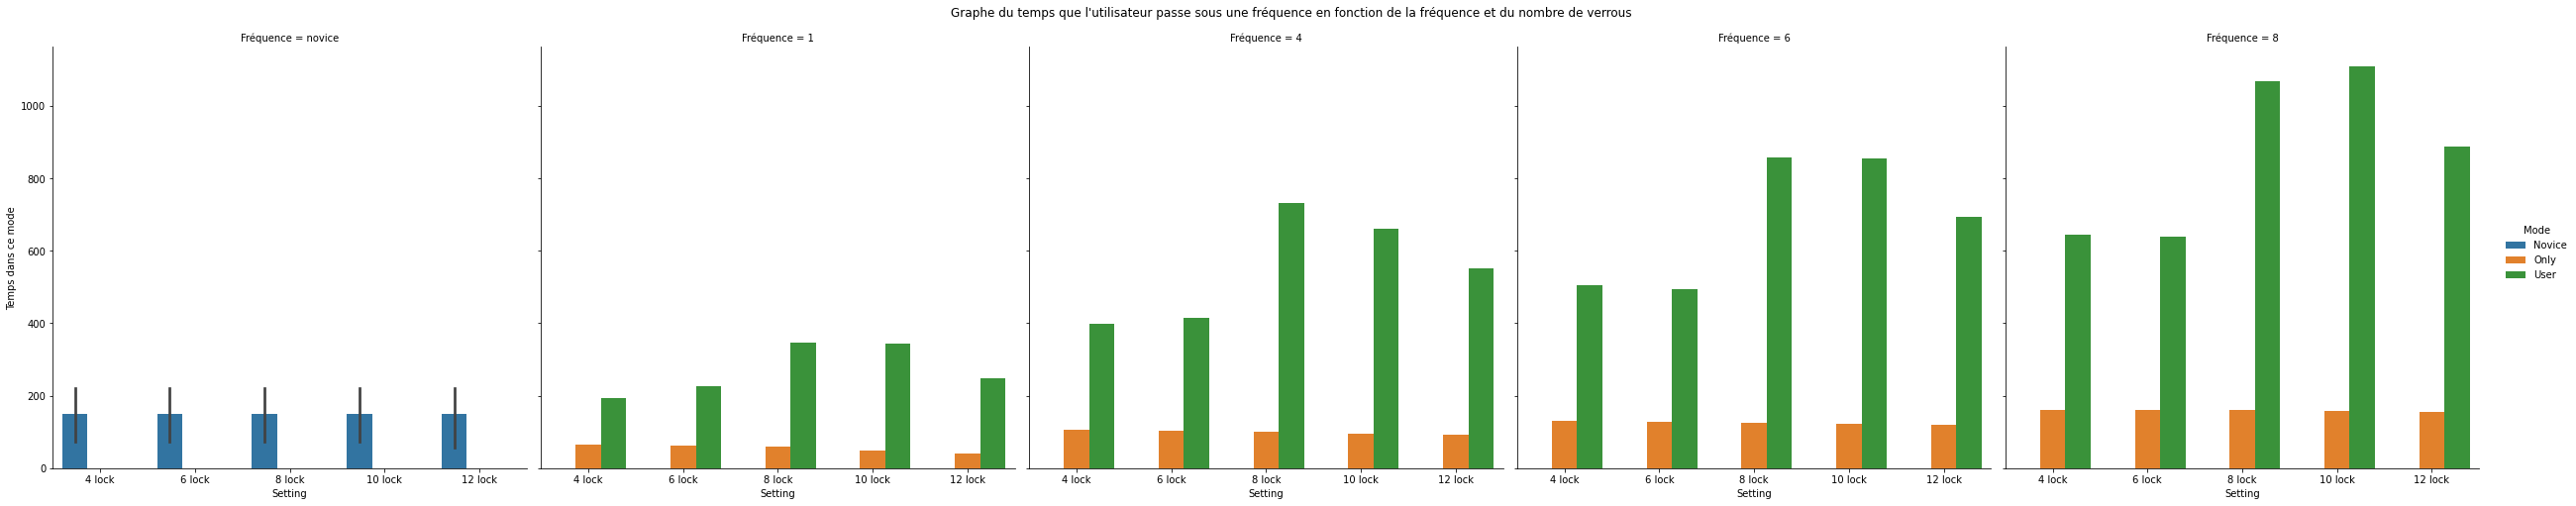

In [35]:
fig4 = sns.catplot(data =res, x = "Setting", y ="Temps dans ce mode",hue="Mode",kind = "bar",col = "Fréquence",height=7)
fig4.fig.subplots_adjust(top=0.9)
fig4.fig.suptitle("Graphe du temps que l'utilisateur passe sous une fréquence en fonction de la fréquence et du nombre de verrous")

In [36]:
u_novice = df[df["mode_used"]=="novice"]

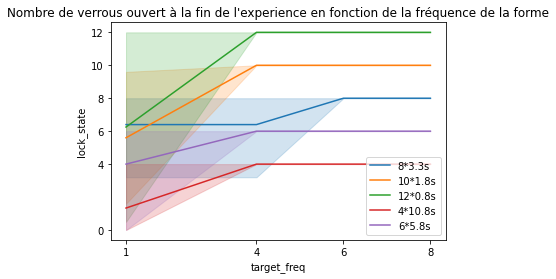

In [37]:
b = pd.DataFrame(df.groupby(["test_id","setting_used","target_freq"],group_keys=False)[["lock_state"]].max())
b.reset_index(inplace = True)
g = sns.lineplot(data = b, x = "target_freq", y="lock_state",hue="setting_used")
g.set_xticks([1,4,6,8])
g.set_yticks([0,4,6,8,10,12])
plt.title("Nombre de verrous ouvert à la fin de l'experience en fonction de la fréquence de la forme")
plt.legend(loc="lower right")


In [38]:
dgroup = df.groupby(["test_id"])

In [39]:
d = {"epreuve":[], "setting":[], "nbnovice":[], "nbexpert":[]}
e = {"epreuve":[], "setting":[],"mode":[],"frequence": [],"nb": []}
i = {"epreuve":[], "setting":[],"frequence": [],"nb": []}

for no,group in dgroup:
    d["epreuve"].append(no)
    d["setting"].append(group.iloc[0]["setting_used"])
    d["nbnovice"].append(group[group["mode_used"]=="novice"].count(numeric_only=True)[0] )
    d["nbexpert"].append(group[group["mode_used"]=="expert"].count(numeric_only=True)[0])
    for f in [1,4,6,8]:
        for c in ["novice","expert"]:
            e["epreuve"].append(no)
            e["setting"].append(group.iloc[0]["setting_used"])
            e["mode"].append(c)
            e["frequence"].append(f)
            e["nb"].append(group[(group["mode_used"]==c) & (group["target_freq"] == f)].count(numeric_only=True)[0])
        i["epreuve"].append(no)
        i["setting"].append(group.iloc[0]["setting_used"])
        i["frequence"].append(f)
        i["nb"].append(group[(group["target_freq"] == f) & (group["mode_used"] == "novice") & (group["lock_state"]>0)].count(numeric_only=True)[0])


dg = pd.DataFrame(d)
de = pd.DataFrame(e)
di = pd.DataFrame(i)

Text(0.5, 1.0, "Nombre d'utilisations moyen du mode novice en fonction des paramètres")

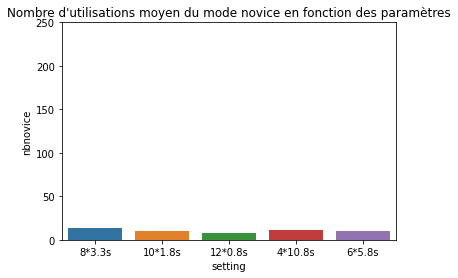

In [41]:
ax = sns.barplot(data= dg,x = "setting",y="nbnovice", ci = None)
ax.set_yticks([0,50,100,150,200,250])
plt.title("Nombre d'utilisations moyen du mode novice en fonction des paramètres")



Text(0.5, 1.0, "Nombre d'utilisations moyen du mode expert en fonction des paramètres")

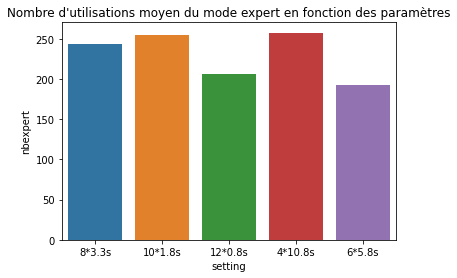

In [42]:
sns.barplot(data= dg,x = "setting",y="nbexpert",ci = None)
plt.title("Nombre d'utilisations moyen du mode expert en fonction des paramètres")

Text(0.5, 1.0, "Nombre d'utilisations moyen du mode novice en fonction des paramètres et de la fréquence")

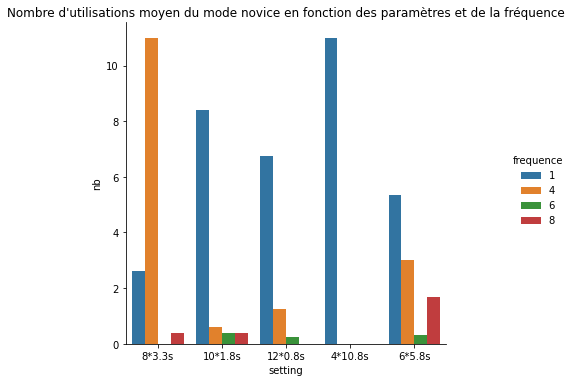

In [43]:
sns.catplot(data= de[de["mode"]=="novice"],x = "setting",y="nb",hue="frequence",kind = "bar",ci=None)
plt.title("Nombre d'utilisations moyen du mode novice en fonction des paramètres et de la fréquence")

Text(0.5, 1.0, "Nombre d'utilisations moyen du mode expert en fonction des paramètres et de la fréquence")

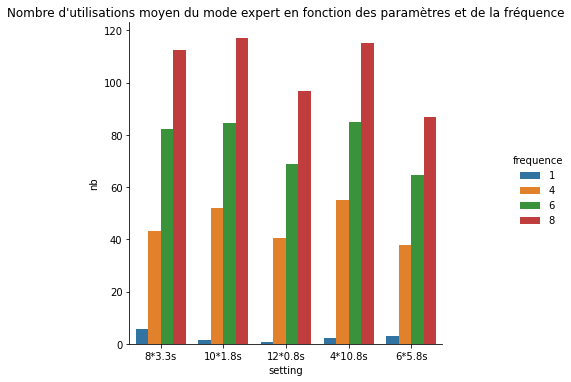

In [44]:
sns.catplot(data= de[de["mode"]=="expert"],x = "setting",y="nb",hue="frequence",kind = "bar",ci=None)
plt.title("Nombre d'utilisations moyen du mode expert en fonction des paramètres et de la fréquence")

Text(0.5, 1.0, "Nombre d'utilisation moyen du mode novice apres avoir débloqué au moins un verrou")

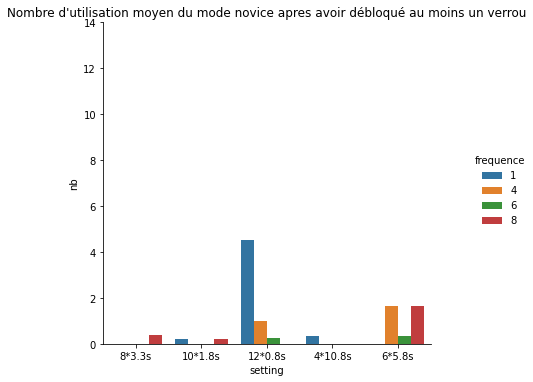

In [48]:
a = sns.catplot(data= di,x = "setting",y="nb",hue="frequence",kind = "bar",ci=None, )
a.set(yticks=[0,2,4,6,8,10,12,14])
plt.title("Nombre d'utilisation moyen du mode novice apres avoir débloqué au moins un verrou")

Text(0.5, 1.0, "Nombre d'utilisation moyen du mode novice apres avoir débloqué au moins un verrou")

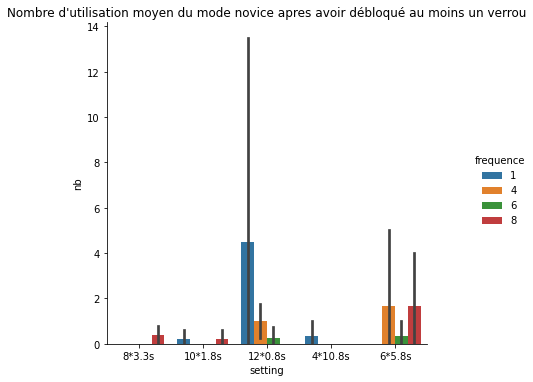

In [46]:
sns.catplot(data= di,x = "setting",y="nb",hue="frequence",kind = "bar")
plt.title("Nombre d'utilisation moyen du mode novice apres avoir débloqué au moins un verrou")